<a href="https://colab.research.google.com/github/Rayan76q/CLIP_analysis/blob/main/CLIP_FairVLMed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -U gdown
import gdown
file_id = "12oJbYhO8losIkZirQUqkbJGtl7WvstH-"
output = "dataset.zip"
gdown.download(f"https://drive.google.com/uc?id={file_id}", output, quiet=False)

import zipfile
with zipfile.ZipFile("dataset.zip", 'r') as zip_ref:
    zip_ref.extractall("dataset")

file_id = "1ey9CpldpHXRWH3jMzveW9K6tYyfCpNuy"
output = "metadata_summary.csv"
gdown.download(f"https://drive.google.com/uc?id={file_id}", output, quiet=False)

!ls -l


Downloading...
From (original): https://drive.google.com/uc?id=12oJbYhO8losIkZirQUqkbJGtl7WvstH-
From (redirected): https://drive.google.com/uc?id=12oJbYhO8losIkZirQUqkbJGtl7WvstH-&confirm=t&uuid=64b8d004-946d-4b1b-a6f5-0da596190345
To: /content/dataset.zip
100%|██████████| 2.68G/2.68G [00:57<00:00, 46.6MB/s]


KeyboardInterrupt: 

In [ ]:
! pip install ftfy regex tqdm
! pip install git+https://github.com/openai/CLIP.git
! pip install aif360 fairlearn
! pip install umap-learn
! pip install umap-learn[plot]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 3.2 MB/s eta 0:00:00
  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-zrt868yu
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-req-build-zrt868yu
  Resolved https://github.com/openai/CLIP.git to commit dcba3cb2e2827b402d2701e7e1c7d9fed8a20ef1
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 60.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 62.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 44.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
#importation des métas-donénes + labels
import pandas as pd

df_summary = pd.read_csv("metadata_summary.csv")
df_summary["filename"] = df_summary["filename"].apply(lambda x: x.split(".")[0])
df_summary.head()

,filename,age,gender,race,ethnicity,language,maritalstatus,note,gpt4_summary,glaucoma,use
0,data_00001,56.56,female,black,non-hispanic,english,single,ms. PERSON is a 56 yo woman presenting to esta...,The 56 y/o female patient has optic nerve head...,yes,training
1,data_00002,53.91,female,white,non-hispanic,english,single,referred for evaluation of narrow angles ou #p...,Patient was referred for narrow angle evaluati...,yes,training
2,data_00003,46.30,female,white,non-hispanic,english,single,1. left upper lid ptosis: occurred after botox...,"Patient experienced ptosis, ear and eye pain, ...",no,training
3,data_00004,66.52,male,white,non-hispanic,english,single,right plano +0.50 082 left LOCATION -0.50 83 a...,The patient has primary open angle glaucoma - ...,yes,training
4,data_00005,82.52,female,black,non-hispanic,english,divorced,in step. os with nonspecific peripheral defect...,The patient has nonspecific peripheral defects...,yes,training


In [ ]:
import os
import numpy as np
from PIL import Image

FOLDER_PATH = './dataset/Test'


IMAGE_EXTENSIONS = ['.png', '.jpg', '.jpeg']
data_list = []

for filename in os.listdir(FOLDER_PATH):
    if filename.endswith('.npz'):
        file_stem = os.path.splitext(filename)[0]
        npz_path = os.path.join(FOLDER_PATH, filename)
        npz_data = np.load(npz_path, allow_pickle=True)
        id = file_stem.split("_")[-1]


        data_entry = {
            "filename": file_stem,
            "slo_fundus": npz_data["slo_fundus"],
        }

        data_list.append(data_entry)

print(f"Loaded {len(data_list)} entries successfully.")
df = pd.DataFrame(data_list)
df = pd.merge(df, df_summary, on='filename', how='inner').drop(columns = ["use"])
df.head()


Loaded 2000 entries successfully.


,filename,slo_fundus,age,gender,race,ethnicity,language,maritalstatus,note,gpt4_summary,glaucoma
0,data_09924,"[[46, 46, 41, 44, 47, 48, 43, 43, 49, 48, 52, ...",67.22,male,white,non-hispanic,english,married or partnered,67 y.o. m 1. secondary open-angle glaucoma od<...,67-year-old male patient has secondary open-an...,no
1,data_08064,"[[23, 22, 20, 23, 25, 26, 25, 25, 24, 19, 20, ...",83.34,male,white,non-hispanic,english,divorced,"negative: no weight loss, no fevers, no scalp ...","Patient shows no weight loss, fever, or scalp ...",yes
2,data_08432,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",22.88,male,asian,non-hispanic,english,unknown,22 y.o. m 1. poag (s) based on inc c:d ratio o...,22 y.o male with history of primary open-angle...,no
3,data_09244,"[[5, 5, 2, 2, 4, 3, 4, 5, 5, 7, 8, 7, 6, 6, 5,...",63.20,female,asian,non-hispanic,unknown,married or partnered,"DATE_TIME f hx htn, mixed collagen vascular di...","The patient has a history of hypertension, col...",yes
4,data_08811,"[[31, 33, 36, 33, 30, 33, 28, 28, 31, 32, 33, ...",31.78,female,white,hispanic,english,married or partnered,cirrus; retina; no future labs/procedures comp...,"Patient has history of migraines, vertigo, ane...",no


In [ ]:
import os
import clip
import torch
from PIL import Image, ImageEnhance, ImageFilter
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np
from umap import UMAP
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.metrics import roc_auc_score # Import roc_auc_score here

class RunCLIP:
  def __init__(self, images, model_name="ViT-B/32"):
    self.images = images
    self.device = "cuda" if torch.cuda.is_available() else "cpu"
    self.model, self.preprocess = clip.load(model_name, self.device)
    self.model_name = model_name
    self.run_result = None
    self.features = None

  def setClasses(self, classes_dict):
    self.classes_dict = classes_dict
    self.classes = []
    self.yes_class_index = -1
    for cat in classes_dict.values():
      for idx, c in enumerate(cat):
        self.classes.append(c[1])
        if c[1] == "yes":
            self.yes_class_index = len(self.classes) - 1


  def _encode_image(self, image):
    image_input = self.preprocess(Image.fromarray(image.astype(np.uint8))).unsqueeze(0).to(self.device)
    with torch.no_grad():
        image_features = self.model.encode_image(image_input)
        image_features /= image_features.norm(dim=-1, keepdim=True)
    return image_features

  def _encode_text(self, text_list):
      text_inputs = torch.cat([clip.tokenize(text) for text in text_list]).to(self.device)
      with torch.no_grad():
          text_features = self.model.encode_text(text_inputs)
          text_features /= text_features.norm(dim=-1, keepdim=True)
      return text_features

  def _get_text_classes(self):
      return [f"{c[0]}" for category_list in self.classes_dict.values() for c in category_list]

  def _compute_similarity_with_metadata(self, image_features, metadata_text):
      text_meta_input = clip.tokenize([metadata_text]).to(self.device)
      with torch.no_grad():
          text_meta_features = self.model.encode_text(text_meta_input)
          text_meta_features /= text_meta_features.norm(dim=-1, keepdim=True)

      text_classes = self._get_text_classes()
      text_features = self._encode_text(text_classes)

      img_similarity = (100.0 * image_features @ text_features.T).softmax(dim=-1)
      meta_similarity = (100.0 * text_meta_features @ text_features.T).softmax(dim=-1)

      return torch.mean(img_similarity, meta_similarity)

  def _compute_similarity_standard(self, image_features):
      text_classes = self._get_text_classes()
      text_features = self._encode_text(text_classes)
      return (100.0 * image_features @ text_features.T).softmax(dim=-1)

  def _get_top_predictions(self, similarity, topk):
      values, indices = similarity[0].topk(topk)
      return values.cpu().detach().numpy(), indices.cpu().detach().numpy()

  def _create_description(self, indices, similarity, topk):
      desc = {k: None for k in self.classes_dict.keys()}

      for j in range(topk):
          predicted_class = self.classes[indices[j].item()]
          for k in desc.keys():
              if predicted_class in [c[1] for c in self.classes_dict[k]] and desc[k] is None:
                  desc[k] = predicted_class

      desc["similarity_score"] = similarity[0][self.yes_class_index].cpu().item()
      return desc

  def _plot_single_image_results(self, image, top_probs, top_classes, image_idx, n_rows, n_cols):
      plt.subplot(n_rows, n_cols, 2 * image_idx + 1)
      plt.imshow(image)
      plt.axis("off")

      plt.subplot(n_rows, n_cols, 2 * image_idx + 2)
      y = np.arange(top_probs.shape[-1])
      plt.grid()
      plt.barh(y, top_probs)
      plt.gca().invert_yaxis()
      plt.gca().set_axisbelow(True)
      plt.yticks(y, [self.classes[index] for index in top_classes])
      plt.xlabel("probability")

  def runPreds(self, topk=8, plot_preview=True, metadata_text=None):
      if metadata_text is not None:
          assert len(metadata_text) == len(self.images), \
          "Metadata text must have the same length as images."
      else:
          if not hasattr(self, 'classes'):
              raise ValueError("Classes not set. Call setClasses() first.")
          if self.yes_class_index == -1:
              raise ValueError("Could not find the 'yes' class index. Ensure 'yes' is in your classes_dict values.")

      topk = min(topk, len(self.classes))

      all_image_features = []
      images_desc = []
      all_top_probs = []
      all_top_classes = []

      for i, image in enumerate(self.images):
          image_features = self._encode_image(image)
          all_image_features.append(image_features.cpu().numpy().squeeze())

          if metadata_text is not None:
              similarity = self._compute_similarity_with_metadata(image_features, metadata_text[i])
          else:
              similarity = self._compute_similarity_standard(image_features)

          top_probs, top_classes = self._get_top_predictions(similarity, topk)
          all_top_probs.append(top_probs)
          all_top_classes.append(top_classes)

          desc = self._create_description(top_classes, similarity, topk)
          images_desc.append(desc)

      if plot_preview:
          num_images = min(10, len(self.images))

          plt.figure(figsize=(16, 16))
          n_cols = 4
          n_rows = (num_images + 1) // 2

          for i in range(num_images):
              self._plot_single_image_results(
                  self.images[i], all_top_probs[i], all_top_classes[i],
                  i, n_rows, n_cols
              )

          plt.subplots_adjust(wspace=0.5, hspace=0.5)
          plt.show()

      self.features = np.vstack(all_image_features)
      self.run_result = pd.DataFrame(images_desc)

  def export_to_csv(self, path):
      if self.run_result is None:
          raise ValueError("runPreds() has not been called yet.")
      self.run_result.to_csv(path, index=False)

  def plot_latent_space(self, label_col: str, n_neighbors: int = 3, min_dist: float = 0.1, random_state: int = 42):
      if self.run_result is None or self.features is None:
          raise ValueError("You must call runPreds() first.")

      if label_col not in self.run_result.columns:
          raise ValueError(f"Column '{label_col}' not found in run_result DataFrame.")

      X = self.features
      y = self.run_result[label_col].values

      valid_mask = pd.notnull(y)
      X = X[valid_mask]
      y = y[valid_mask]

      if len(X) == 0:
          print("No valid data points found for plotting latent space.")
          return

      X_scaled = StandardScaler().fit_transform(X)
      reducer = UMAP(n_neighbors=n_neighbors, min_dist=min_dist, random_state=random_state)
      embedding = reducer.fit_transform(X_scaled)
      unique_labels = np.unique(y)

      if len(unique_labels) > 20:
          print(f"Warning: Too many unique labels ({len(unique_labels)}). Plotting may not be clear.")

      cmap = plt.cm.get_cmap('tab20', len(unique_labels))
      color_map = {lbl: cmap(i) for i, lbl in enumerate(unique_labels)}

      plt.figure(figsize=(10, 8))
      for lbl in unique_labels:
          mask_lbl = (y == lbl)
          plt.scatter(embedding[mask_lbl, 0], embedding[mask_lbl, 1],
                    s=15, color=color_map[lbl], label=lbl, alpha=0.8)

      plt.gca().set_aspect('equal', 'datalim')
      plt.legend(title=label_col, bbox_to_anchor=(1.05, 1), loc='upper left')
      plt.title(f'UMAP of CLIP features colored by {label_col}', fontsize=14)
      plt.xlabel('UMAP 1', fontsize=12)
      plt.ylabel('UMAP 2', fontsize=12)
      plt.tight_layout()
      plt.show()

100%|███████████████████████████████████████| 338M/338M [00:06<00:00, 55.0MiB/s]


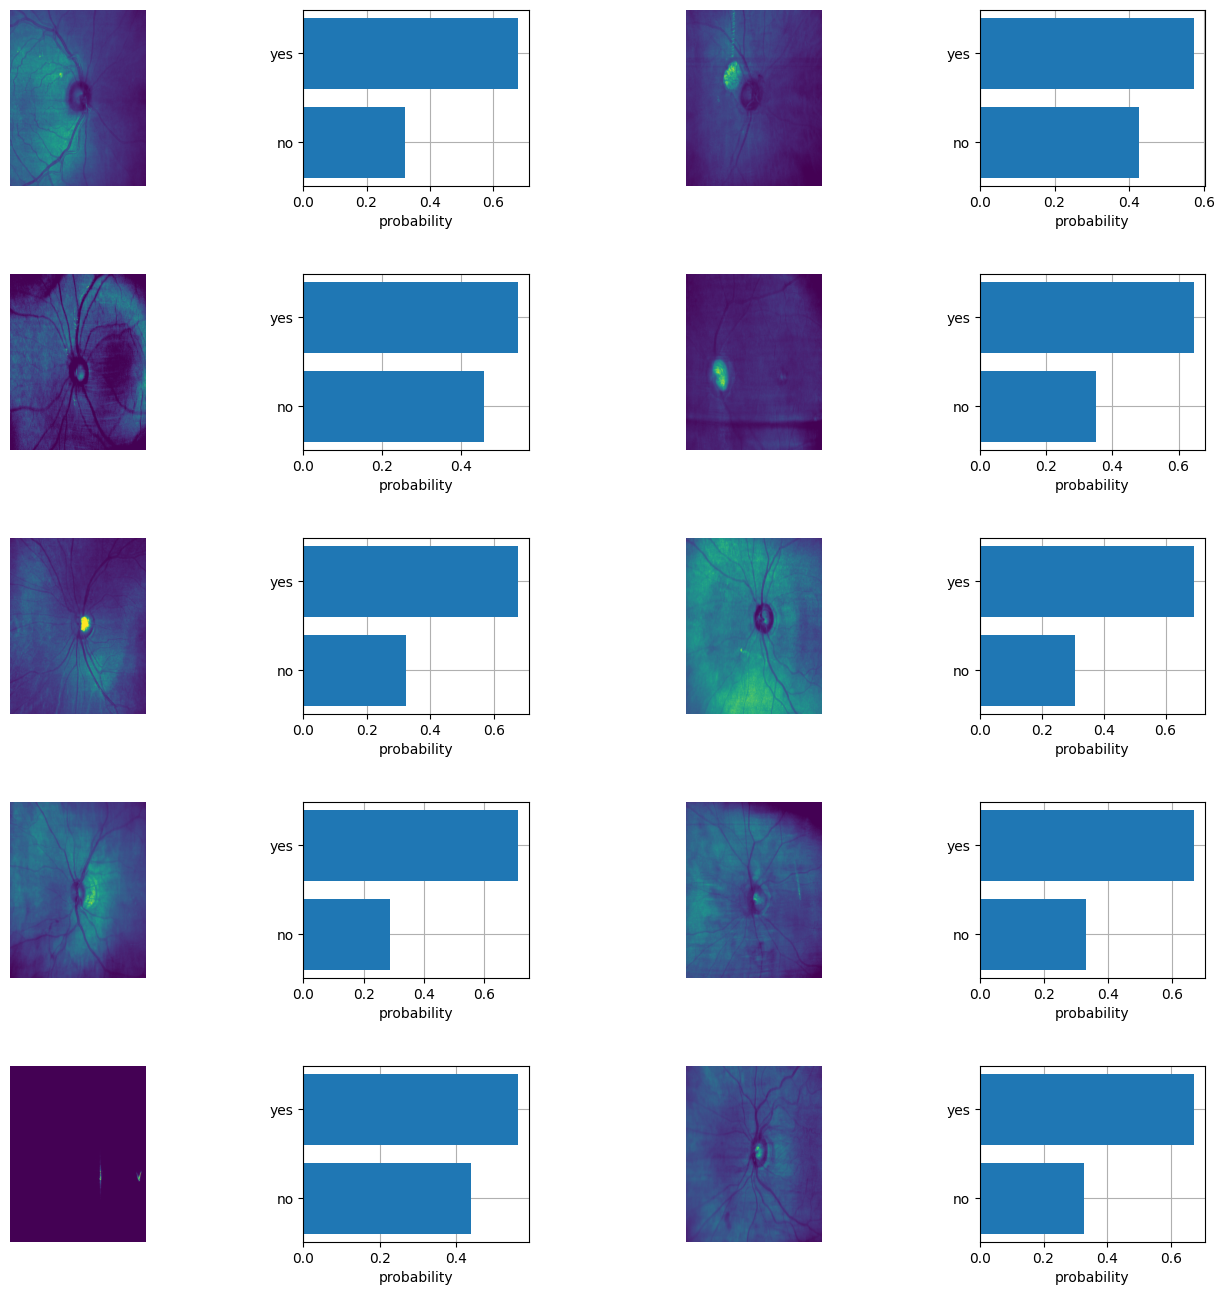

In [ ]:
test = RunCLIP(list(df["slo_fundus"]))
test.setClasses({
   "pred": [("a medical picture of a person with glaucoma", "yes") , ("a medical picture of a person without glaucoma", "no")]
})
test.runPreds()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
<ipython-input-5-c3e7b3e8e12b>:182: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('tab20', len(unique_labels))


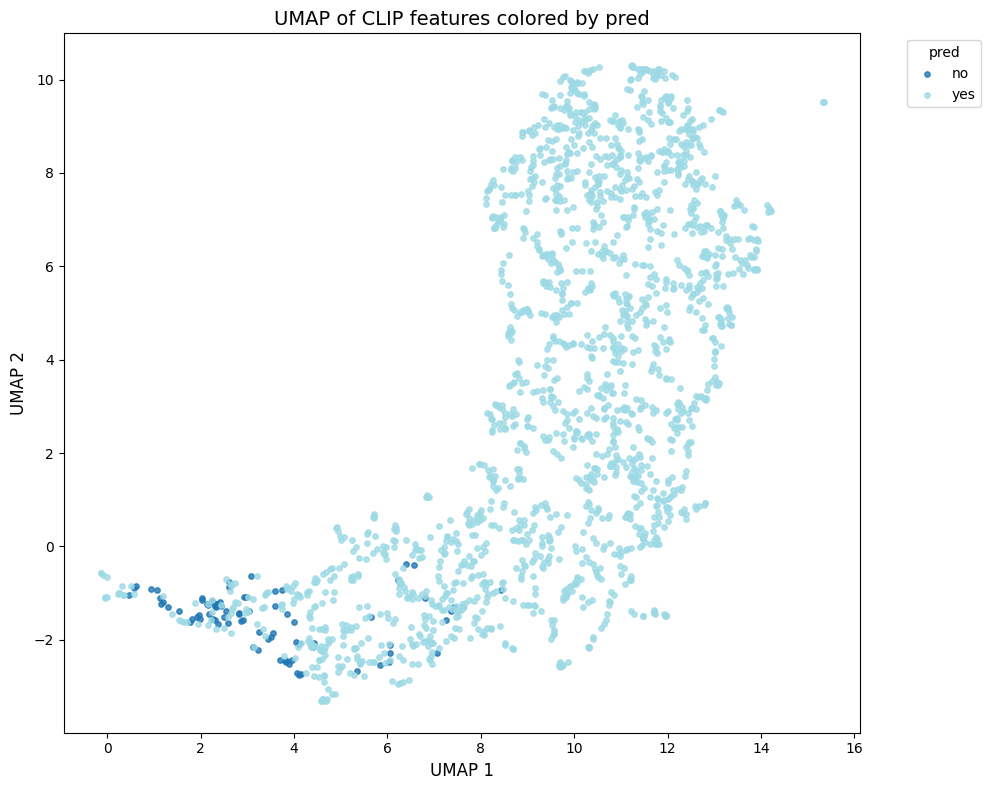

In [ ]:
test.plot_latent_space("pred")

In [ ]:
merge = df.copy().drop(columns = [c for c in df.columns if c != "glaucoma"])
merge["pred"] = test.run_result["pred"]
print(f"acc : { (merge['glaucoma'] == merge['pred']).sum() / len(merge)*100 : .2f}")

acc :  49.05


### Avec meta-donneés

In [ ]:
!pip install --upgrade transformers accelerate
!pip install bitsandbytes

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.2/40.2 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.5/10.5 MB 106.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 362.1/362.1 kB 30.2 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 4.51.3
    Uninstalling transformers-4.51.3:
      Successfully uninstalled transformers-4.51.3
  Attempting uninstall: accelerate
    Found existing installation: accelerate 1.6.0
    Uninstalling accelerate-1.6.0:
      Successfully uninstalled accelerate-1.6.0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.1/76.1 MB 11.2 MB/s eta 0:00:00


In [ ]:
summaries

['67-year-old male patient has secondary open-angle glaucoma . Also has early cataracts and old central vein occlusion .',
 'Patient shows no weight loss, fever, or scalp tenderness . Elevated IOP indicates presence of Glaucoma . Recommended treatment includes Cosopt and Pataday.',
 '22 y.o male with history of primary open-angle glaucoma has increased cup-to-disc ratio . Elevated intraocular pressure (IOP) reportedly well-controlled .',
 "the patient has a history of hypertension, collagen vascular disease, and hydroxychloroquine use . There's a subfoveal lesion in left eye, possibly adult-onset vitelliform foveomacular dystrophy .",
 'Patient has history of migraines, vertigo, aneurysm of ophthalmic artery, optic neuropathy and myopia. No mention of glaucoma.',
 'The patient has impaired vision due to cortical dysfunction . No changes in current medication are required .',
 'Patient had transient vision change without residual optic neuropathy. Recommended MRI orbit and repeat neuro-

In [ ]:
model_id = "Falconsai/text_summarization"

from transformers import AutoTokenizer, AutoModelForSeq2SeqLM, pipeline

tokenizer = AutoTokenizer.from_pretrained(model_id)
model = AutoModelForSeq2SeqLM.from_pretrained(model_id)
pipe = pipeline("summarization", model=model, tokenizer=tokenizer, device=-1)

def summarize(note):
    prompt = f"summarize: {note}"
    try:
        summary = pipe(prompt, max_length=80, min_length=20, do_sample=False)[0]["summary_text"]
        return summary.strip()
    except:
        return "SUMMARY_FAILED"


summaries = [summarize(note) for note in df["gpt4_summary"]]


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/2.32k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.42M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.20k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.49k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/242M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Device set to use cpu
Your max_length is set to 80, but your input_length is only 74. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=37)
Both `max_new_tokens` (=256) and `max_length`(=80) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Your max_length is set to 80, but your input_length is only 50. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=25)
Both `max_new_tokens` (=256) and `max_length`(=80) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/t

NameError: name 'files' is not defined

In [ ]:
from google.colab import files
with open("medical_notes_summaries_v1.txt", "w") as f:
    f.write("\\".join(summaries))
files.download("medical_notes_summaries_v1.txt")
summaries = []
try:
    with open("medical_notes_summaries_v1.csv", "r") as f:
        content = f.read().strip()
        summaries = content.split(";")
except FileNotFoundError:
    print("Error: medical_notes_summaries_v1.csv not found. Please generate it first.")
except Exception as e:
    print(f"An error occurred: {e}")

print(f"Loaded {len(summaries)} summaries.")
# You can now use the 'summaries' list

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Error: medical_notes_summaries_v1.csv not found. Please generate it first.
Loaded 0 summaries.


In [ ]:
clip_runner = RunCLIP(list(df["slo_fundus"]))
clip_runner.setClasses({
   "pred": [("a medical picture of a person with glaucoma", "yes") , ("a medical picture of a person without glaucoma", "no")]
})
clip_runner.runPreds(metadata_text=summaries)

In [ ]:
clip_runner.plot_latent_space("pred")

In [ ]:
merge = df.copy().drop(columns = [c for c in df.columns if c != "glaucoma"])
merge["pred"] = clip_runner.run_result["pred"]
print(f"acc : { (merge['glaucoma'] == merge['pred']).sum() / len(merge)*100 : .2f}")

In [ ]:
resultat = clip_runner.run_result.copy()
resultat["label"] = df["glaucoma"]
resultat["race"] = df["race"]

from sklearn.metrics import roc_auc_score

for race, group_df in resultat.groupby("race"):
    auc = roc_auc_score(group_df["label"], group_df["similarity_score"])
    print(f"[{race}] AUC: {auc:.3f}")